In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from scipy.stats import randint #for randomizedsearchcv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load music data, read from CSV
music = pd.read_csv("/Users/katybohanan/Desktop/5530_Project/raw_data/genres_v2.csv", low_memory=False).fillna("0")

In [3]:
music.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   

  Unnamed: 0 title  
0          0     0  
1          0     0  
2          0     0  
3          0     0  
4          0     0  

[5 rows x 22 columns]

In [6]:
music = music[music['genre']!='Pop'] #removing because model was predicting this genre with 0 accuracy
music = music.replace("Hiphop", "Rap")
music = music.replace("Underground Rap", "Rap")
music = music.replace("Dark Trap", "trap")

In [7]:
music.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature  genre                                      song_name  \
0              4   trap                            Mercury: Retrograde   
1              4   trap                                      Pathology   
2              4   trap                                       Symbiote   
3              3   trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4   trap                                          Venom   

  Unnamed: 0 title  
0          0     0  
1          0     0  
2          0     0  
3          0     0  
4          0     0  

[5 rows x 22 columns]

In [8]:
#drop least relevant attributes
columns_to_drop = ['title','Unnamed: 0', 'id', 'analysis_url', 'track_href', 'uri', 'type', 'song_name']
music.drop(columns=columns_to_drop, inplace=True)

In [9]:
music.shape[0]

41844

In [10]:
music['genre'].value_counts()

Rap           10751
trap           7565
trance         2999
techhouse      2975
dnb            2966
psytrance      2961
techno         2956
hardstyle      2936
RnB            2099
Trap Metal     1956
Emo            1680
Name: genre, dtype: int64

In [11]:
print(music.columns)

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre'],
      dtype='object')


<Axes: xlabel='genre', ylabel='count'>

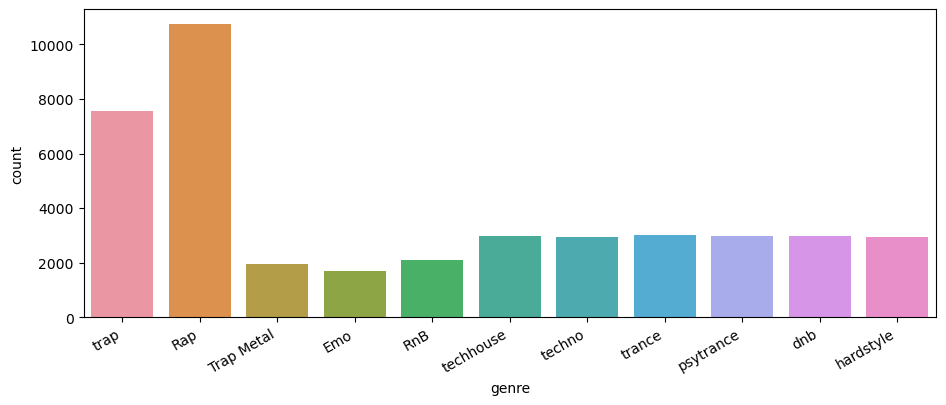

In [12]:
#create visuals to understand data

#genre counts
plt.subplots(figsize=(11, 4))
plt.xticks(rotation=30, ha='right')
sns.countplot(x ='genre', data = music)

In [13]:
#use correlation map to check if any variables are too similar in values
corr_metrics = music.corr()
corr_metrics.style.background_gradient()

/var/folders/3w/nn9k251d6d18w3zvylmhxyhr0000gn/T/ipykernel_63927/2624682573.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_metrics = music.corr()


<Axes: xlabel='tempo', ylabel='energy'>

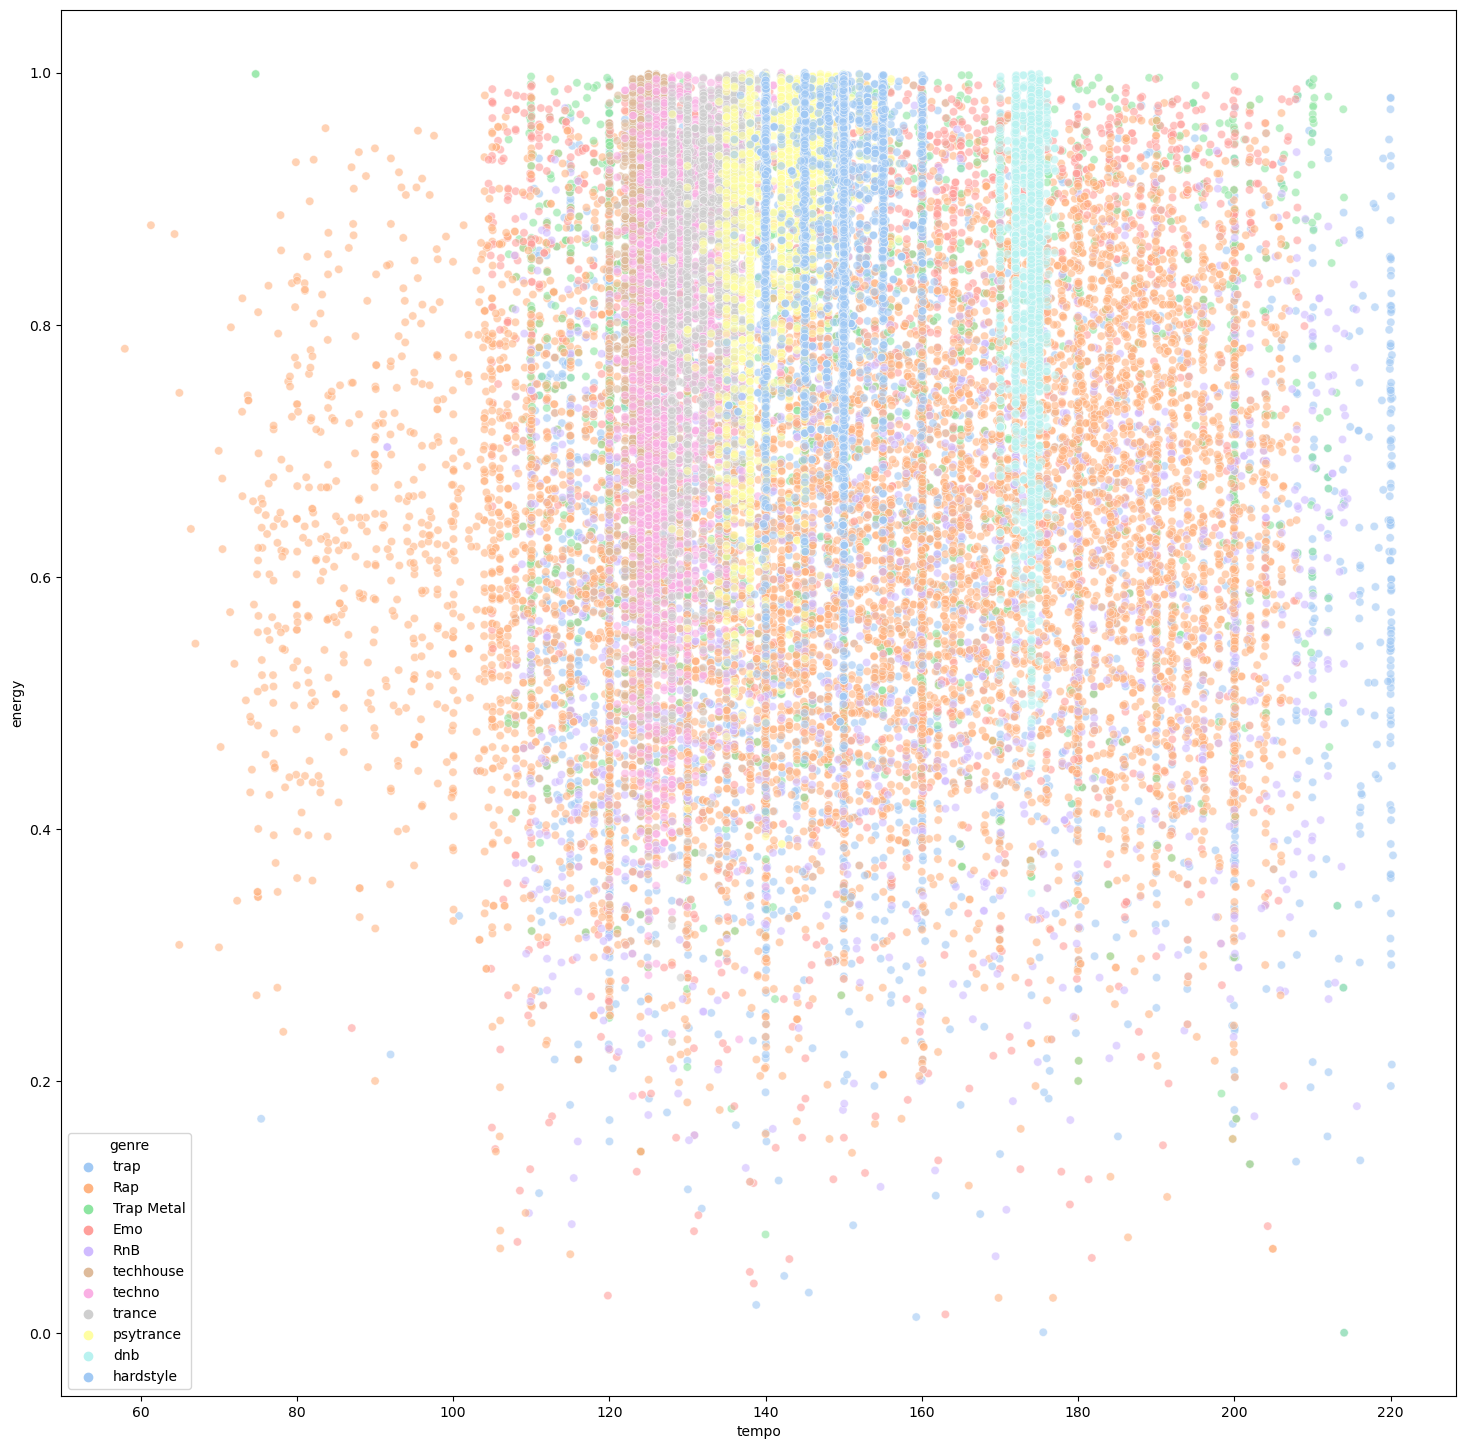

In [14]:
#scatterplot for attrinutes: tempo and energy
plt.subplots(figsize=(18, 18))
sns.scatterplot(x = 'tempo', y = 'energy', data = music, hue='genre',palette = 'pastel', alpha = 0.6)

<Axes: xlabel='duration_ms', ylabel='instrumentalness'>

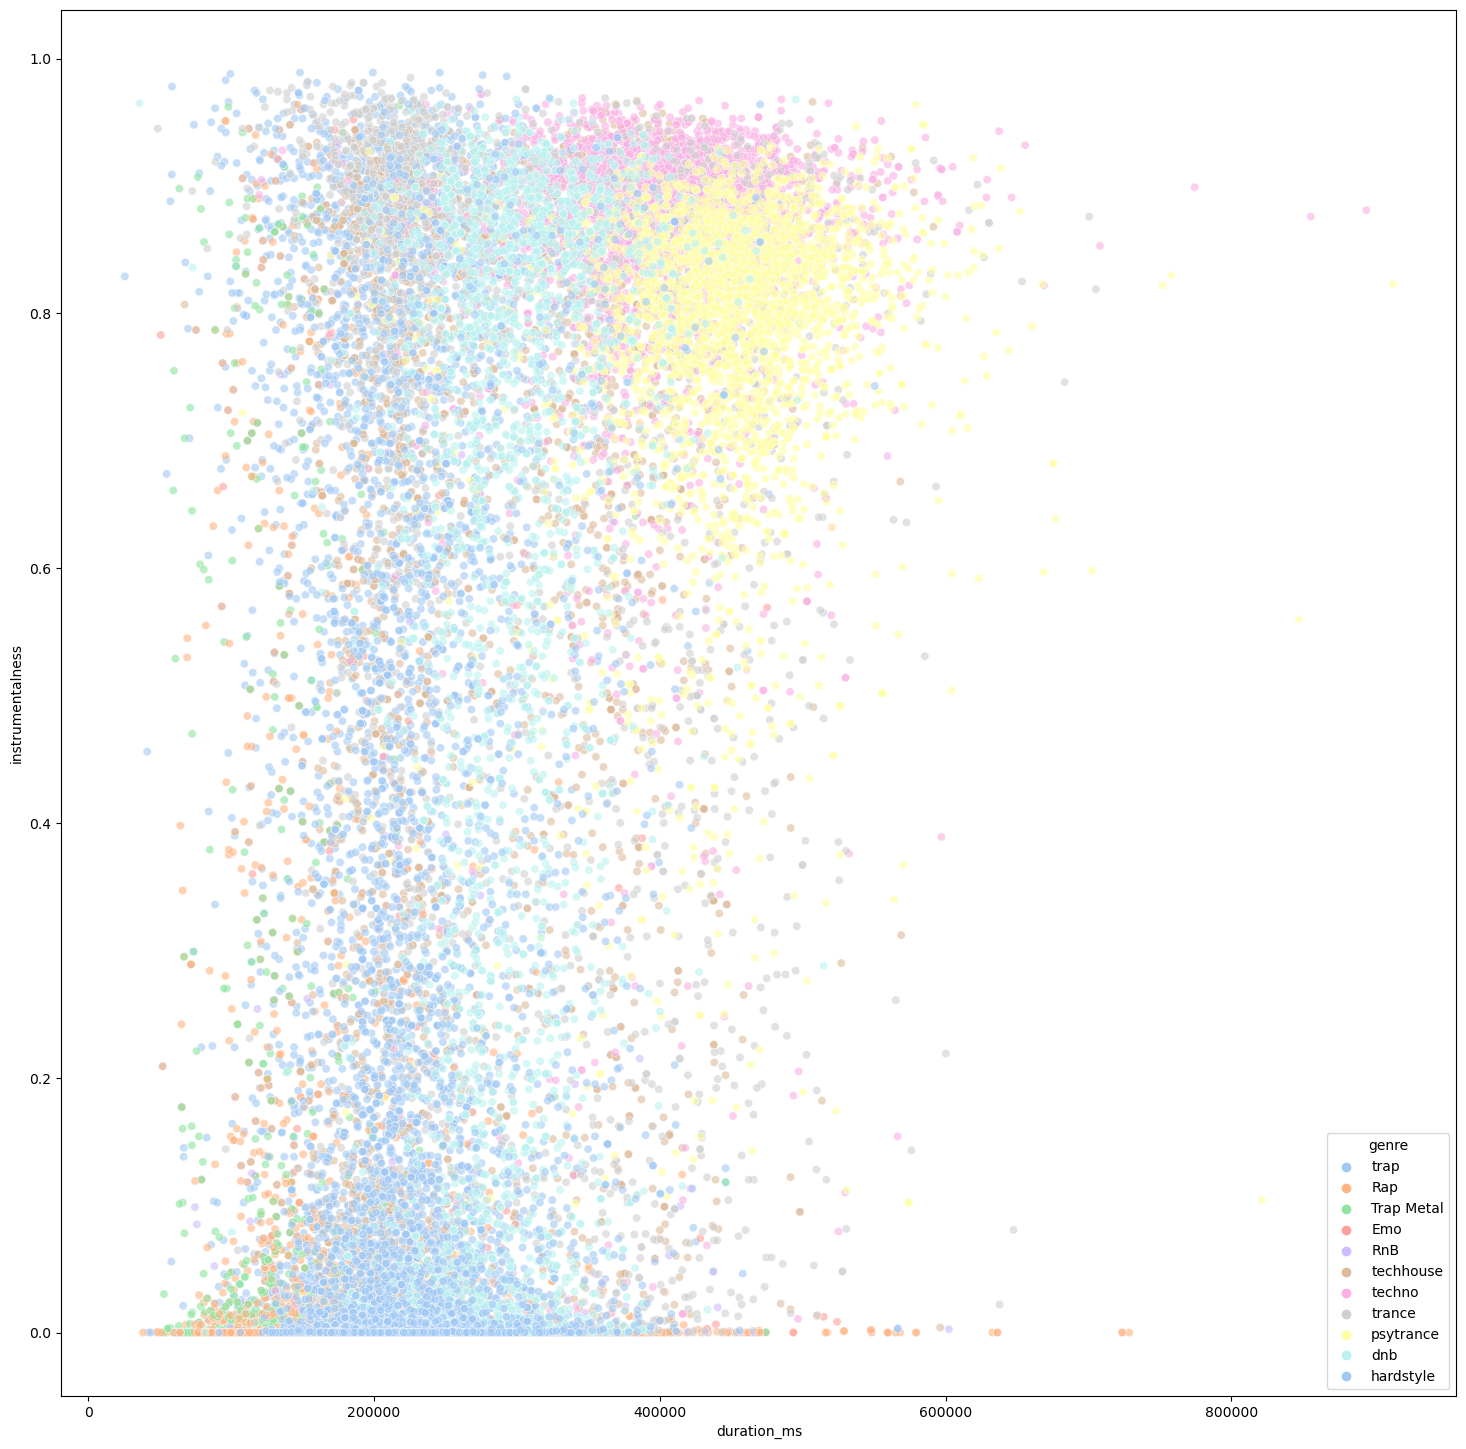

In [15]:
#scatterplot for attrinutes: duration_ms and instrumentalness
plt.subplots(figsize=(18, 18))
sns.scatterplot(x = 'duration_ms', y = 'instrumentalness', data = music, hue='genre',palette = 'pastel', alpha = 0.6)

<Axes: xlabel='energy', ylabel='instrumentalness'>

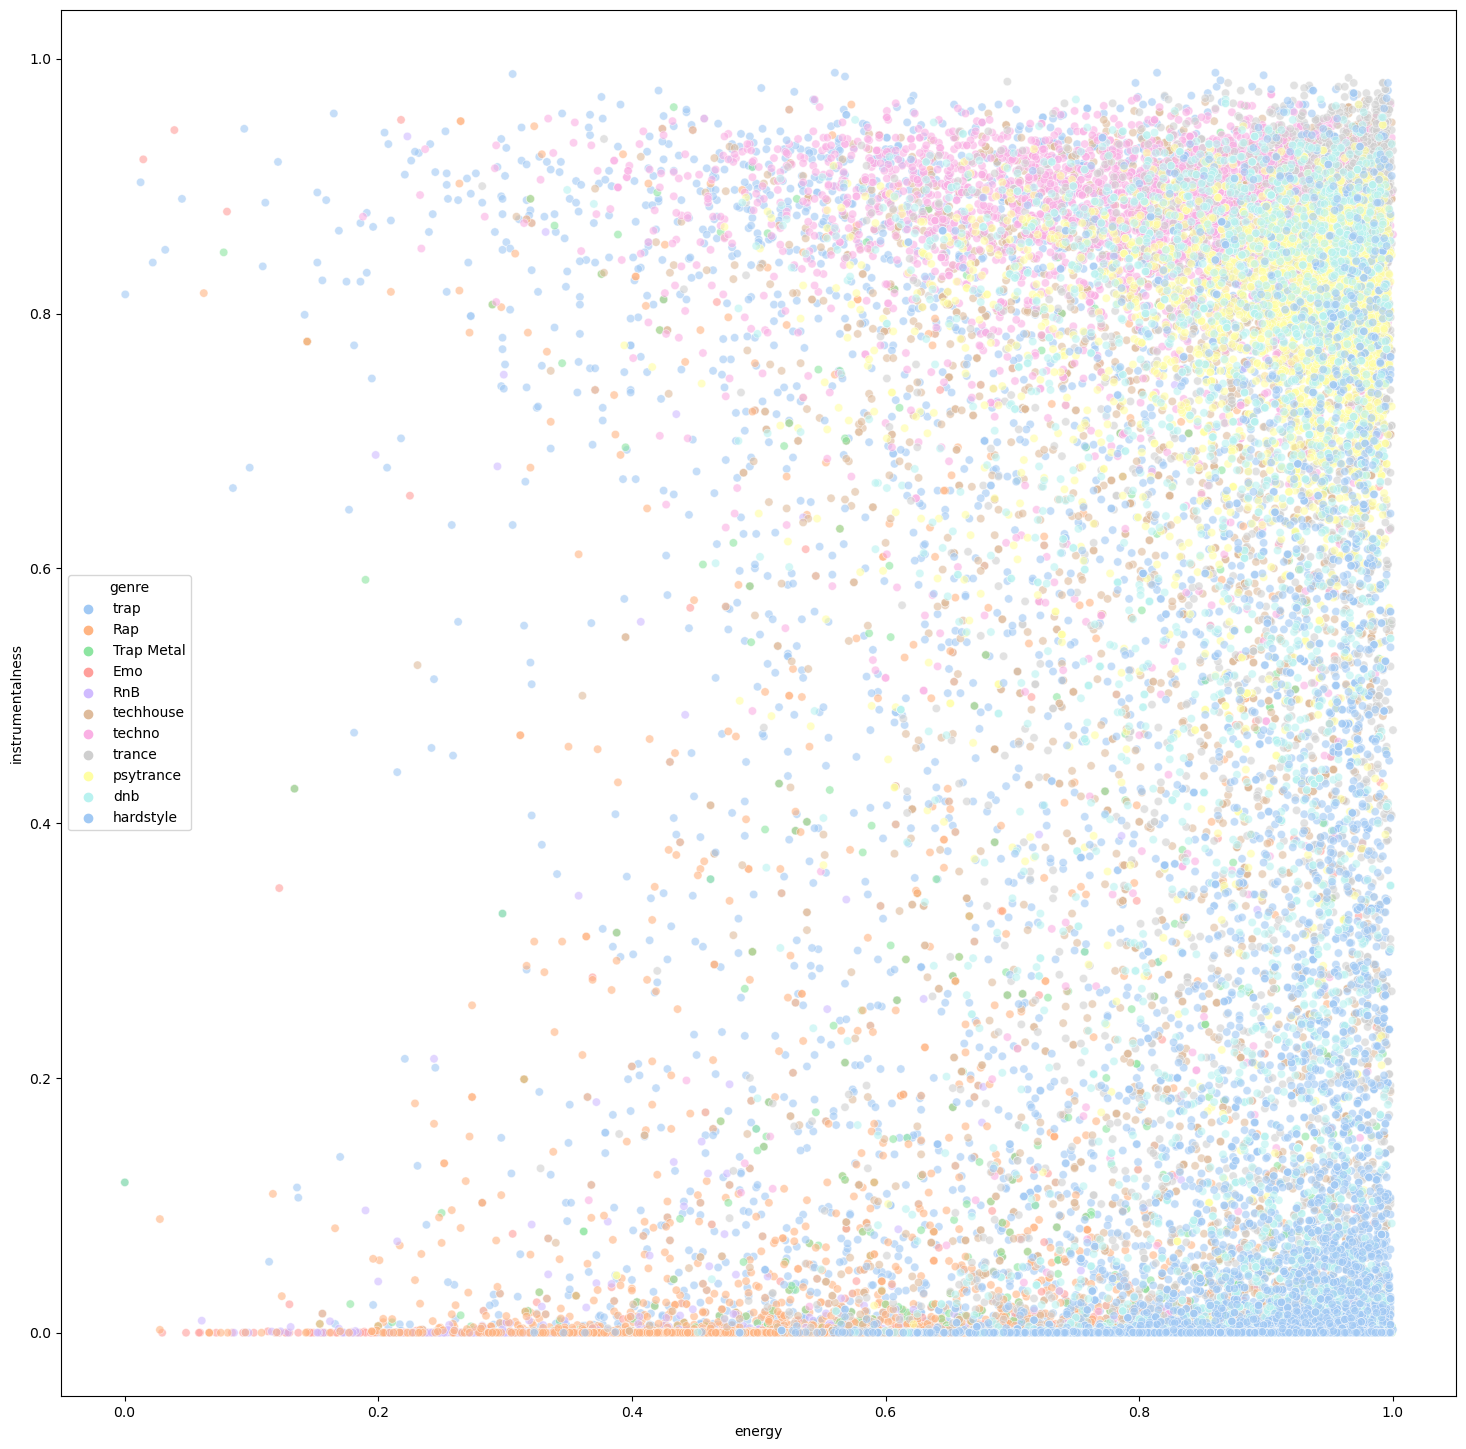

In [16]:
#scatterplot for attrinutes: energy and instrumentalness
plt.subplots(figsize=(18, 18))
sns.scatterplot(x = 'energy', y = 'instrumentalness', data = music, hue='genre',palette = 'pastel', alpha = 0.6)

<Axes: xlabel='valence', ylabel='danceability'>

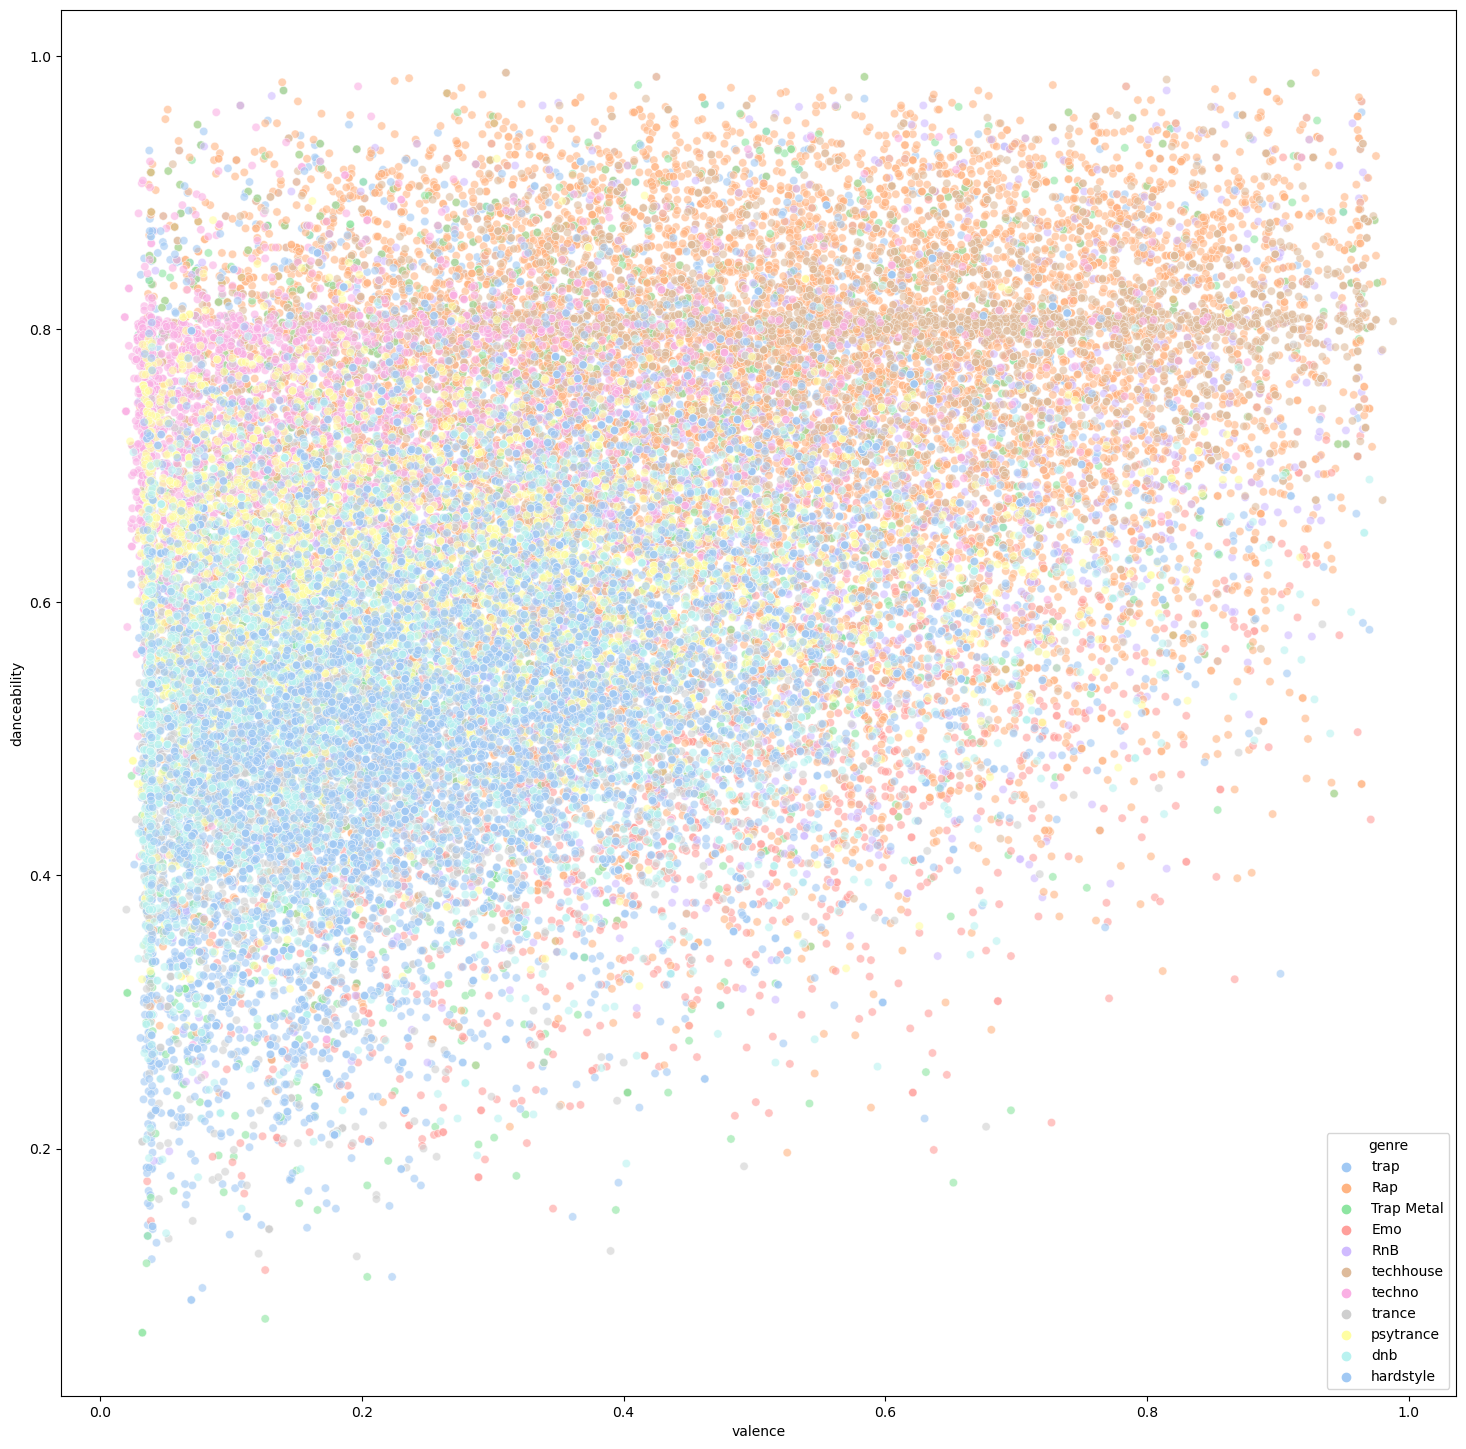

In [17]:
#scatterplot for attrinutes: valence and danceability
plt.subplots(figsize=(18, 18))
sns.scatterplot(x = 'valence', y = 'danceability', data = music, hue='genre',palette = 'pastel', alpha = 0.6)

# Create a LabelEncoder
le = LabelEncoder()

# Fit and transform the 'genre' column
music['genre'] = le.fit_transform(music['genre'])

# Drop rows with missing values in numeric columns
music_numeric = music.select_dtypes(include='number').dropna()

# Calculate correlation matrix
corr_matrix = music_numeric.corr()

# Extract correlations with 'genre' column
correlations = corr_matrix['genre'].sort_values(ascending=False)
print(correlations)

In [12]:
music.drop(['mode','loudness','time_signature','key'],axis=1, inplace=True)

In [13]:
#sort data into features category (numerical) and labels category (non-numerical)
features = music.drop(["genre"], axis=1)
labels = music[["genre"]]

In [14]:
#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state=42, train_size=0.8, stratify=labels)

In [15]:
#set parameters for RandomizedSearch
param_dist = {
    'n_estimators': randint(85, 255),
    'max_depth': randint(5, 15),
    'min_samples_split': randint(2, 20)
}

random_search = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='f1_weighted', 
    random_state=42
)

In [16]:
random_search.fit(X_train, y_train.values.ravel())

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x128c7d8d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x128dd5210>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x128dd4c10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x128cffd90>},
                   random_state=42, scoring='f1_weighted')

In [17]:
print("Best Parameters: ", random_search.best_params_)
print("Best weighted f1: ", random_search.best_score_)

Best Parameters:  {'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 135}
Best Accuracy:  0.7338804900566515


In [ ]:
forest = RandomForestClassifier(n_estimators = 135, max_depth = 11, min_samples_split = 6, random_state = 42)

In [11]:
forest.fit(X_train, y_train.values.ravel())

NameError: name 'forest' is not defined

In [ ]:
# Get feature importances
feature_importances = forest.feature_importances_

# Check if X_train is a DataFrame
if isinstance(X_train, pd.DataFrame):
    features = X_train.columns
else:
    features = ['energy', 'key', 'loudness', 'speechiness', 'acousticness','instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

if not isinstance(X_train, pd.DataFrame):
    X_train_df = pd.DataFrame(X_train, columns=features)
else:
    X_train_df = X_train

# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the features by importance in descending order
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_features['Importance'], align='center')
plt.yticks(range(len(sorted_features)),sorted_features['Feature'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [ ]:
print(f"model score on training data: {forest.score(X_train, y_train)}")
print(f"model score on testing data: {forest.score(X_test, y_test)}")

In [ ]:
print(classification_report(y_test, forest.predict(X_test)))

In [ ]:
df2 = pd.read_csv("/Users/katybohanan/Desktop/5530_Project/manual_test/chrislake_move_baby.csv", low_memory=False)

In [ ]:
forest.predict(df2)